In [42]:
import numpy as np

def parse_logs(name):
    f = open(name, "r")
    line = f.readline()
    line = f.readline()


    train_accuracy_= []
    test_accuracy_= [] 
    test_robust36_= [] 
    time_= []

    while(len(line) > 0):
        line = f.readline()
        vals = line.split('\t')
        if len(vals) < 10:
            break
        train_accuracy_.append(float(vals[4]))
        test_accuracy_.append(float(vals[6]))
        test_robust36_.append(float(vals[7]))
        time_.append(float(vals[0]))

    return train_accuracy_, test_accuracy_, test_robust36_, time_


In [43]:
train_accuracy = []
test_accuracy = []
test_robust36 = []
time = []
file_name = []

num_terms = [1,2,3,4,5,10,12]

In [44]:
import os

path = '/home/alexander/HSE/matexp_approximation/SOC/logs/standard_Lip5_CIFAR10'

for file in sorted(os.listdir(path)):

    path_to_file = os.path.join(path, file)
    train_accuracy_, test_accuracy_, test_robust36_, time_ = parse_logs(path_to_file)
    train_accuracy.append(train_accuracy_)
    test_accuracy.append(test_accuracy_)
    test_robust36.append(test_robust36_)
    file_name.append(file)
    time.append(time_)

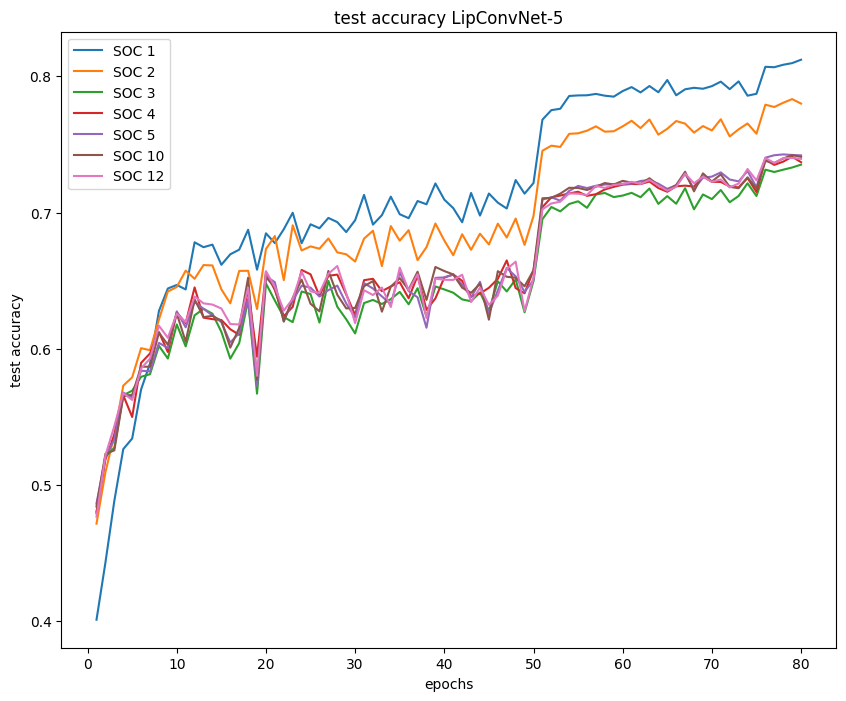

In [45]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 1, figsize=(10,8))

N=80

# line, = ax[0].plot(num_terms, time, marker='o')
# ax[0].set_xlabel("number of terms in train")
# ax[0].set_ylabel("per epoch time in seconds")
# ax[0].set_title('standard Lip5 k-k terms')

ax.set_xlabel("epochs")
ax.set_ylabel("test accuracy")
ax.set_title('test accuracy LipConvNet-5')

for i, test_accuracy_ in enumerate(test_accuracy):
    if len(test_accuracy_[:N]) == 0:
        continue
    line, = ax.plot(list(range(1,N+1)), test_accuracy_[:N], label = f"SOC {num_terms[i]}")

ax.legend()


# ax[2].set_xlabel("epochs")
# ax[2].set_ylabel("test accuracy")
# ax[2].set_title('test accuracy Lip5')

# for i, test_accuracy_ in enumerate(test_accuracy):

#     line, = ax[2].plot(list(range(1,N+1)), test_accuracy_[:N], label = file_name[i])

# ax[2].legend()


# ax[3].set_xlabel("epochs")
# ax[3].set_ylabel("robust accuracy")
# ax[3].set_title('robust accuracy Lip5')

# for i, robust_accuracy_ in enumerate(test_robust36):

#     line, = ax[3].plot(list(range(1,N+1)), robust_accuracy_[:N], label = file_name[i])

# ax[3].legend()


plt.show()

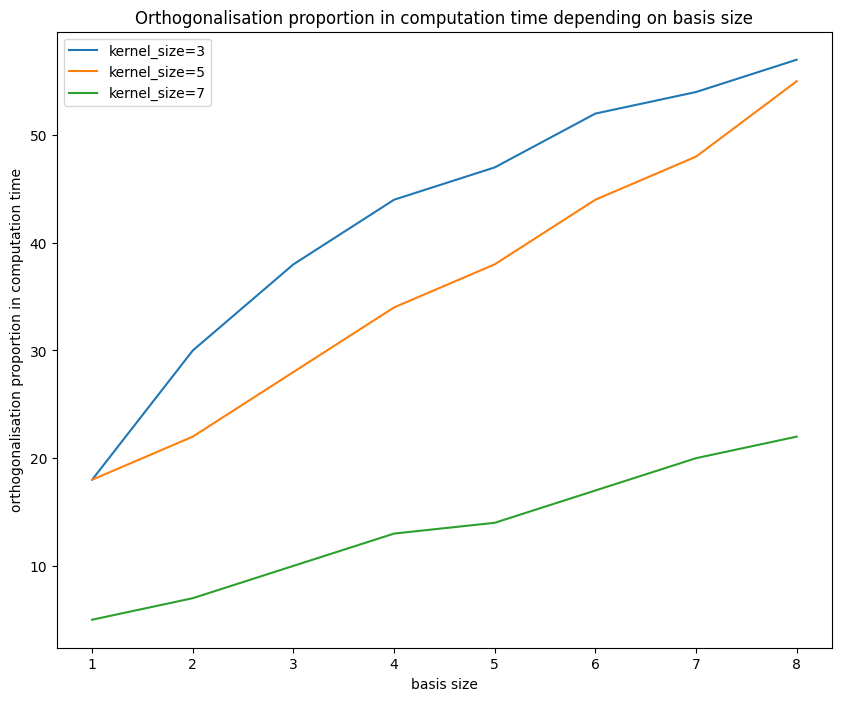

In [1]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1, 1, figsize=(10,8))

x = list(range(1,9))

y3 = [18, 30, 38, 44, 47, 52, 54, 57]
y5 = [18, 22, 28, 34, 38, 44, 48, 55]
y7 = [5, 7, 10, 13, 14, 17, 20, 22]

ax.set_xlabel("basis size")
ax.set_ylabel("orthogonalisation proportion in computation time")
ax.set_title('Orthogonalisation proportion in computation time depending on basis size')

line, = ax.plot(x, y3, label = "kernel_size=3")
line, = ax.plot(x, y5, label = "kernel_size=5")
line, = ax.plot(x, y7, label = "kernel_size=7")

ax.legend()

plt.show()